In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-07-10 01:56:49--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  12.1MB/s    in 29s     

2020-07-10 01:57:19 (10.6 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
from os import listdir
listdir()
%cd tmp/rockpaperscissors
print(listdir())
%cd ../..

[Errno 2] No such file or directory: 'tmp/rockpaperscissors'
/content
['.config', 'sample_data']
/


In [ ]:
base_folder = '/tmp/rockpaperscissors/rps-cv-images'
train_dir = os.path.join(base_folder, '')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split = 0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 150),
    shuffle=True,
    class_mode='categorical',
    subset = 'training',
    batch_size=2
)
test_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 150),
    shuffle=False,
    class_mode='categorical',
    subset = 'validation',
    batch_size=2
)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential(
    [
        layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (100, 150, 3)),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(32, (3,3), activation = 'relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64, (3,3), activation = 'relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(512, activation = 'relu'),
        layers.Dense(3, activation = 'softmax')
    ]
)

In [ ]:
model.compile(
    optimizer='Adam', 
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history= model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20,
      validation_data=test_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 3s - loss: 1.1684 - accuracy: 0.3400 - val_loss: 1.1061 - val_accuracy: 0.0000e+00
Epoch 2/20
25/25 - 3s - loss: 1.1028 - accuracy: 0.3000 - val_loss: 1.0729 - val_accuracy: 0.8000
Epoch 3/20
25/25 - 3s - loss: 1.1000 - accuracy: 0.4400 - val_loss: 1.1209 - val_accuracy: 0.1000
Epoch 4/20
25/25 - 3s - loss: 1.0755 - accuracy: 0.4800 - val_loss: 0.7855 - val_accuracy: 0.8000
Epoch 5/20
25/25 - 3s - loss: 0.9207 - accuracy: 0.6122 - val_loss: 1.0553 - val_accuracy: 0.0000e+00
Epoch 6/20
25/25 - 3s - loss: 1.0473 - accuracy: 0.4600 - val_loss: 0.7482 - val_accuracy: 0.8000
Epoch 7/20
25/25 - 3s - loss: 0.8620 - accuracy: 0.6000 - val_loss: 1.1530 - val_accuracy: 0.3000
Epoch 8/20
25/25 - 3s - loss: 0.7227 - accuracy: 0.6400 - val_loss: 1.0610 - val_accuracy: 0.3000
Epoch 9/20
25/25 - 3s - loss: 0.5486 - accuracy: 0.8000 - val_loss: 1.2001 - val_accuracy: 0.4000
Epoch 10/20
25/25 - 3s - loss: 0.5875 - accuracy: 0.7600 - val_loss: 0.6218 - val_accuracy: 0.6000
Epoch 11/20

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 148, 16)       448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10880)             0

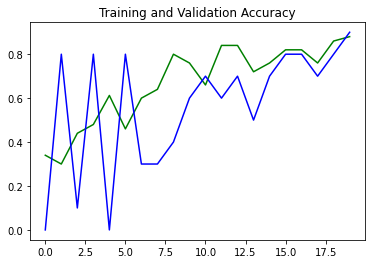

In [ ]:
import matplotlib.pyplot as plt

epoch=range(1,20)
plt.plot(history.history['accuracy'],'g',label='Training loss')
plt.plot(history.history['val_accuracy'], 'b', label='validation loss')
plt.title('Training and Validation Accuracy')
plt.show()


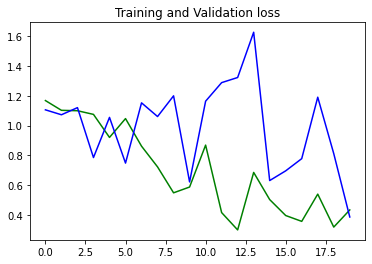

In [ ]:
plt.plot(history.history['loss'],'g',label='Training loss')
plt.plot(history.history['val_loss'], 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.show()

In [ ]:
hasil = model.predict(test_generator)
print(hasil)

[[0.9194188  0.07563899 0.00494225]
 [0.98582286 0.00912234 0.00505485]
 [0.3590161  0.63606054 0.00492343]
 ...
 [0.67179364 0.04869704 0.27950937]
 [0.92843294 0.02157938 0.04998759]
 [0.919631   0.00164163 0.07872732]]


Saving 1jHtb93pI8f6pfKo.png to 1jHtb93pI8f6pfKo.png
1jHtb93pI8f6pfKo.png
[[1. 0. 0.]]
KERTAS


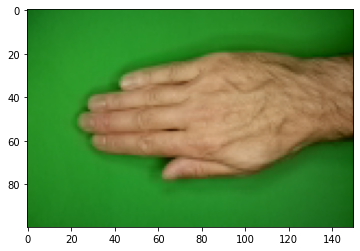

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  print(classes)
  if classes[0][0]==1:
    print('KERTAS')
  elif classes[0][1]==1:
    print('BATU')
  elif classes[0][2]==1:
    print('GUNTING')